In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [9]:
df=pd.read_csv('trade1.csv')
df.head(5)

,Direction,Year,Date,Weekday,Measure,Value,Cumulative,Country,Commodity,Transport_Mode
0,Exports,2015,1/1/2015,Thursday,$,104000000,104000000,All,All,All
1,Exports,2015,2/1/2015,Friday,$,96000000,200000000,All,All,All
2,Exports,2015,3/1/2015,Saturday,$,61000000,262000000,All,All,All
3,Exports,2015,4/1/2015,Sunday,$,74000000,336000000,All,All,All
4,Exports,2015,5/1/2015,Monday,$,105000000,442000000,All,All,All


In [10]:
df=df.drop(["Direction","Weekday","Measure","Country","Commodity","Transport_Mode"],axis=1)
df.head(5)

,Year,Date,Value,Cumulative
0,2015,1/1/2015,104000000,104000000
1,2015,2/1/2015,96000000,200000000
2,2015,3/1/2015,61000000,262000000
3,2015,4/1/2015,74000000,336000000
4,2015,5/1/2015,105000000,442000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98507 entries, 0 to 98506
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        98507 non-null  int64 
 1   Date        98507 non-null  object
 2   Value       98507 non-null  int64 
 3   Cumulative  98507 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ MB


In [12]:
df["Date"]=df["Date"].astype('datetime64[ns]')
df.dtypes

Year                   int64
Date          datetime64[ns]
Value                  int64
Cumulative             int64
dtype: object

In [13]:
df_groupby_Year=df.groupby("Year")
df_groupby_Year["Year"].count()

Year
2015    16005
2016    16028
2017    15995
2018    16019
2019    16017
2020    16031
2021     2412
Name: Year, dtype: int64

In [14]:
df.groupby('Year').groups
df_x = df.groupby('Year')
df_x.agg('max')

,Date,Value,Cumulative
Year,,,
2015,2015-12-31,447000000,52510000000
2016,2016-12-31,495000000,51621000000
2017,2017-12-31,474000000,56476000000
2018,2018-12-31,523000000,63412000000
2019,2019-12-31,401000000,64366000000
2020,2020-12-31,549000000,59943000000
2021,2021-12-02,319000000,8817000000


In [15]:
df_x = df.groupby('Year')
df_x.agg('mean')

,Value,Cumulative
Year,,
2015,2.550866e+07,4.594115e+09
2016,2.518743e+07,4.591304e+09
2017,2.781532e+07,4.926312e+09
2018,3.015929e+07,5.392358e+09
2019,3.121065e+07,5.638055e+09
2020,2.984876e+07,5.441778e+09
2021,2.848019e+07,7.521480e+08


In [16]:
df_x = df.groupby('Year')
df_x.agg('sum')

,Value,Cumulative
Year,,
2015,408266052000,73528808754000
2016,403704143000,73589415681000
2017,444906007000,78796366714000
2018,483121678000,86380178521000
2019,499900924000,90304728425000
2020,478505545000,87237147772000
2021,68694213000,1814181088000


In [17]:
df.sort_values(by=["Year","Value"])

,Year,Date,Value,Cumulative
1462,2015,2015-03-01,0,13000000
1575,2015,2015-04-26,0,938000000
1606,2015,2015-05-27,0,1209000000
1645,2015,2015-05-07,0,1556000000
1701,2015,2015-08-30,0,2012000000
...,...,...,...,...
97886,2021,2021-03-02,299000000,5562000000
97893,2021,2021-10-02,299000000,6431000000
96699,2021,2021-02-24,303000000,7238000000
97881,2021,2021-01-29,312000000,4752000000


In [21]:
df.sort_values(by=["Value","Cumulative"])

,Year,Date,Value,Cumulative
6914,2015,2015-01-01,0,0
6915,2015,2015-02-01,0,0
9811,2015,2015-01-01,0,0
15643,2015,2015-02-01,0,0
15644,2015,2015-03-01,0,0
...,...,...,...,...
93713,2020,2020-06-26,490000000,20870000000
27899,2016,2016-09-09,495000000,34800000000
59925,2018,2018-09-14,523000000,43296000000
95543,2020,2020-06-26,524000000,19615000000


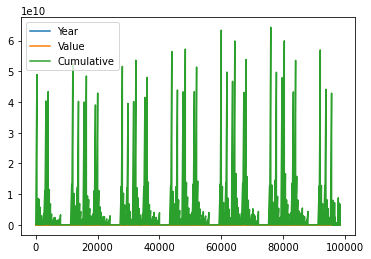

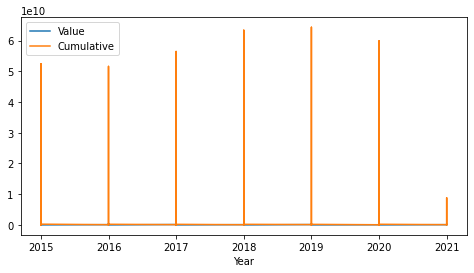

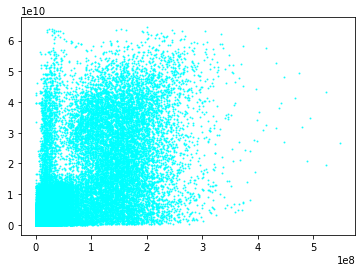

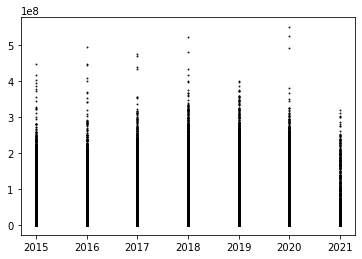

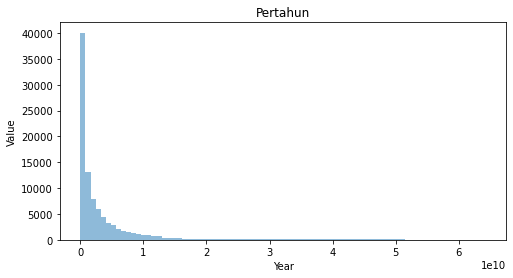

In [18]:
from pandas import read_csv
from matplotlib import pyplot
path ='trade1.csv'
df=read_csv(path,header=0)
df.plot()
pyplot.show()

x = df[['Year','Value','Cumulative']]
x = df.set_index('Year')
x.plot(kind='line',figsize=(8,4))
plt.show()

plt.scatter(df.Value, df.Cumulative, s=1,c="cyan",marker="o", alpha=0.8)
plt.show()

plt.scatter(df.Year, df.Value,s=1,c="black",marker="o", alpha=0.8)
plt.show()

import matplotlib.pyplot as plt
df['Cumulative'].plot(kind='hist',figsize=(8,4), bins=80,alpha=0.5)
plt.title('Pertahun')
plt.ylabel('Value')
plt.xlabel('Year')
plt.show()

In [35]:
df['Value'].describe()

count    9.850700e+04
mean     2.829341e+07
std      5.123152e+07
min      0.000000e+00
25%      1.000000e+06
50%      8.000000e+06
75%      2.700000e+07
max      5.490000e+08
Name: Value, dtype: float64

In [20]:
#melihat apakah ada data yang kosong
df.isna().sum()

Direction         0
Year              0
Date              0
Weekday           0
Measure           0
Value             0
Cumulative        0
Country           0
Commodity         0
Transport_Mode    0
dtype: int64

In [23]:
df2=df.iloc[:,5:7]
df2.head()

,Value,Cumulative
0,104000000,104000000
1,96000000,200000000
2,61000000,262000000
3,74000000,336000000
4,105000000,442000000


In [24]:
import numpy as np
df2_array=np.array(df2)
print(df2_array)

[[104000000 104000000]
 [ 96000000 200000000]
 [ 61000000 262000000]
 ...
 [  1000000  33000000]
 [        0  33000000]
 [        0  33000000]]


In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

minmax=preprocessing.MinMaxScaler().fit_transform(df2)

In [32]:
minmax

array([[0.18943534, 0.00161576],
       [0.17486339, 0.00310723],
       [0.11111111, 0.00407047],
       ...,
       [0.00182149, 0.00051269],
       [0.        , 0.00051269],
       [0.        , 0.00051269]])

In [33]:
df2

,Value,Cumulative
0,104000000,104000000
1,96000000,200000000
2,61000000,262000000
3,74000000,336000000
4,105000000,442000000
...,...,...
98502,0,32000000
98503,0,32000000
98504,1000000,33000000
98505,0,33000000


In [34]:
#mencari nilai minmax
from sklearn.preprocessing import MinMaxScaler
df3=pd.DataFrame(minmax, index=df2.index, columns=df2.columns)
df3

,Value,Cumulative
0,0.189435,0.001616
1,0.174863,0.003107
2,0.111111,0.004070
3,0.134791,0.005220
4,0.191257,0.006867
...,...,...
98502,0.000000,0.000497
98503,0.000000,0.000497
98504,0.001821,0.000513
98505,0.000000,0.000513


In [84]:
#menebak data cluster
#menghitung score
KMeans(n_clusters=2).fit(df3).score(df3)

#menghitung dari 1-20
scr=[]
for i in range (1,20):
    score=KMeans(n_clusters=i).fit(df3).score(df3)
    print(score)
    scr.append(score)

-3016.9808109381834
-895.2836820298247
-577.9604594072405
-432.57403238739
-342.2993840900755
-287.5205565501838
-248.56269420605534
-222.16137276237237
-198.57130024783928
-181.02466400290902
-167.33374909243176
-153.59675160869998
-142.7338023482779
-132.79563554350202
-124.17658028792907
-116.78470464152124
-110.54622419330352
-105.33745009099984
-100.30189751495868


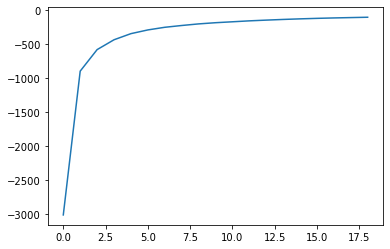

In [85]:
plt.plot(scr)

In [86]:
#dari grafik di atas saya mengambil cluster yang efien yaitu 1-2
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(n_clusters=5)

In [87]:
kmeans.labels_

array([0, 0, 3, ..., 3, 3, 3])

In [88]:
df3['cluster']=kmeans.labels_
df3

,Value,Cumulative,cluster
0,0.189435,0.001616,0
1,0.174863,0.003107,0
2,0.111111,0.004070,3
3,0.134791,0.005220,3
4,0.191257,0.006867,0
...,...,...,...
98502,0.000000,0.000497,3
98503,0.000000,0.000497,3
98504,0.001821,0.000513,3
98505,0.000000,0.000513,3


(array([16522.,     0.,  4552.,     0.,     0.,  4368.,     0., 69999.,
            0.,  3066.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

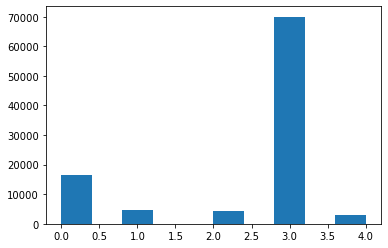

In [90]:
plt.hist(df3['cluster'])

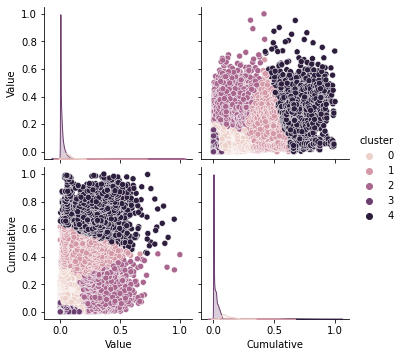

In [91]:
sns.pairplot(df3,hue='cluster')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime

In [5]:
import datetime
start= datetime.datetime(2015,1,1)
end= datetime.datetime(2022,1,1)

In [36]:
df4=df("trade1")
df4.head()

SyntaxError: invalid syntax (<ipython-input-36-05105218dcc6>, line 1)

In [8]:
import matplotlib.pyplot as plt
plt.plot(df4['Cumulative'])

NameError: name 'df4' is not defined

In [102]:
#mengambil rata-rata per 30,100,360 hari

data = df4['Cumulative']
mavg=data.rolling(window=30).mean()
mavg2=data.rolling(window=100).mean()
mavg3=data.rolling(window=360).mean()

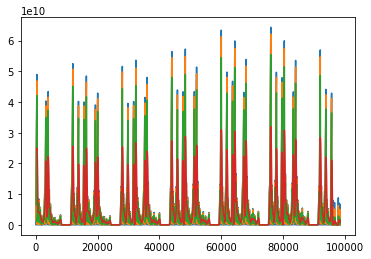

In [100]:
plt.plot(data)
plt.plot(mavg)
plt.plot(mavg2)
plt.plot(mavg3)

In [3]:
import pandas as pd
from fbprophet import Prophet

m = Prophet()
m.fit(df4)

future =m.make_future_dataframe(periods=365)
future.tail()

ModuleNotFoundError: No module named 'fbprophet'